In [ ]:
#model evaluation 27.04.2025

!pip install transformers
!pip install scikit-learn
!pip install pandas


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = AutoModelForSequenceClassification.from_pretrained("MB55/qlora_new").to(device)
tokenizer = AutoTokenizer.from_pretrained("MB55/qlora_new")


df_test = pd.read_csv("test_split.csv")


adapter_config.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/780 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/4.86G [00:00<?, ?B/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/4.86G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/2.69G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/4.86G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/4.86G [00:00<?, ?B/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/4.84G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at LSX-UniWue/LLaMmlein_7B_chat and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


adapter_model.safetensors:   0%|          | 0.00/16.8M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/793k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.95M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

In [ ]:

def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=-1).item()
    return prediction


In [ ]:

label_mapping = {
    "non_advance": 0,
    "advance": 1
}

df_test["true_label"] = df_test["label"].map(label_mapping)


In [ ]:

df_test["predicted_label"] = df_test["input_text"].apply(predict)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:

print(classification_report(df_test["true_label"], df_test["predicted_label"], target_names=["non_advance", "advance"]))


              precision    recall  f1-score   support

 non_advance       0.89      0.80      0.84        60
     advance       0.82      0.90      0.86        60

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120



In [ ]:
from sklearn.metrics import classification_report
from google.colab import files


report = classification_report(df_test["true_label"], df_test["predicted_label"], target_names=["non_advance", "advance"])


with open("/content/evaluation_report.txt", "w") as f:
    f.write(report)

# Download file
files.download("/content/evaluation_report.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(df_test["true_label"], df_test["predicted_label"], target_names=["non_advance", "advance"], output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()


report_df.to_csv("/content/evaluation_report.csv")


files.download("/content/evaluation_report.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

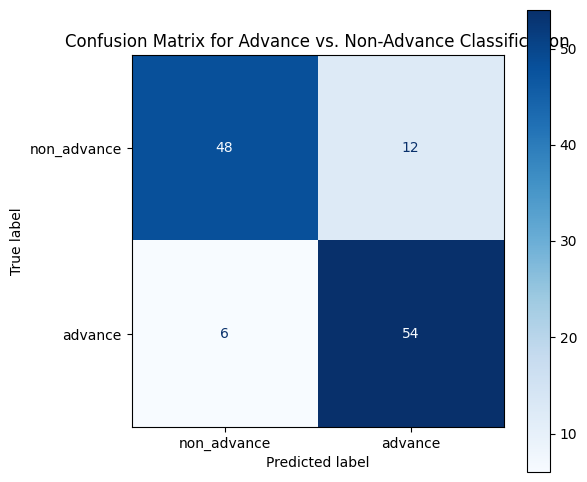

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(df_test["true_label"], df_test["predicted_label"])
class_names = ["non_advance", "advance"]


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap="Blues", colorbar=True)

plt.title("Confusion Matrix for Advance vs. Non-Advance Classification")
plt.show()


In [ ]:
from google.colab import files
files.download("/content/confusion_matrix.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>